### Path Finder: What are the potential paths between two nodes?
### This pipeline can be used to get a ranked path between A and B given a set of paths.

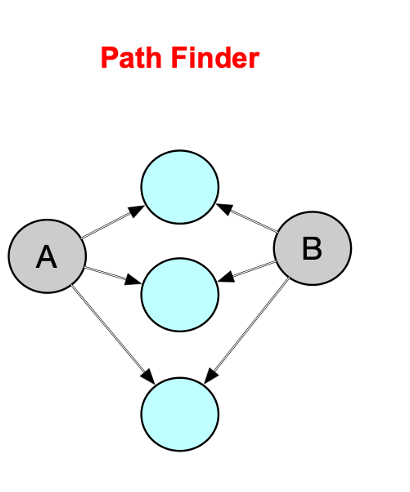

Example questions: 

What drugs may treat ovarian cancer (MONDO:0008170) patients with BRCA1 mutation?  

What is the mechanism of Olaparib being effective for patients with BRCA1 mutation?


In [1]:
from TCT import TCT

from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import  seaborn as sns
import networkx as nx
import numpy as np
import ipycytoscape
import yaml

In [2]:
Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
print(len(Translator_KP_info))
    # Step 2: Get metaKG and all predicates from Translator APIs through the SmartAPI system
metaKG = translator_metakg.get_KP_metadata(APInames) 
print(metaKG.shape)
    # Add metaKG from Plover API based KG resources
APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
print(metaKG.shape)
    # Step 3: list metaKG information
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))



53
(10580, 5)
(22129, 5)


In [6]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder('acute myeloid leukemia', 'NPM1', ['biolink:Gene', 'biolink:Protein'], APInames=APInames, metaKG=metaKG, API_predicates=API_predicates)

MONDO:0018874
NCBIGene:4869
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Text Mined Cooccurrence API' generated an exception: argument of type 'NoneType' is not iterable
CATRAX Pharmacogenomics KP - TRAPI 1.5.0: Success!
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Genetics Data Provider for NCATS Biomedical Translator Reasoners' generated an exception: argument of type 'NoneType' is not iterable
'Automat-hetionet(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-icees-kg(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is n

/Users/guangrong/Documents/GitHub_project/TCT/TCT/TCT.py:1664: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


In [7]:
paths

,score,output_node,predictes1,predictes2,output_node_name
NPM1,0.309524,NCBIGene:4869,biolink:gene_associated_with_condition\nbiolin...,biolink:affects\nbiolink:affects\nbiolink:phys...,NPM1
TP53,0.285714,NCBIGene:7157,biolink:gene_associated_with_condition\nbiolin...,biolink:physically_interacts_with\nbiolink:phy...,TP53
RUNX1,0.190476,NCBIGene:861,biolink:gene_associated_with_condition\nbiolin...,biolink:affects\nbiolink:regulates\nbiolink:in...,RUNX1
KRAS,0.190476,NCBIGene:3845,biolink:gene_associated_with_condition\nbiolin...,biolink:interacts_with\nbiolink:interacts_with...,KRAS
MDM2,0.142857,NCBIGene:4193,biolink:gene_associated_with_condition\nbiolin...,biolink:affects\nbiolink:physically_interacts_...,MDM2
...,...,...,...,...,...
EIF4A1,0.007937,NCBIGene:1973,biolink:gene_associated_with_condition,biolink:physically_interacts_with\nbiolink:phy...,EIF4A1
COPS5,0.007937,NCBIGene:10987,biolink:gene_associated_with_condition,biolink:physically_interacts_with\nbiolink:phy...,COPS5
ZRANB2,0.007937,NCBIGene:9406,biolink:biomarker_for,biolink:colocalizes_with,ZRANB2
MRPL19,0.007937,NCBIGene:9801,biolink:gene_associated_with_condition,biolink:interacts_with\nbiolink:physically_int...,MRPL19


In [8]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('BMP4').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…

In [9]:

#TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores1, result_parsed1, num_of_nodes = 30, input_query = input_node1_id, fontsize = 5)

In [ ]:
#TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores2, result_parsed2, num_of_nodes = 30, input_query = input_node2_id,fontsize = 5,title_fontsize=12)